In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

#diplay preferences
%matplotlib inline
pd.options.display.float_format = '{: .3f}'.format

#suppress harmless error
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
#acquire load and preview data
data = pd.read_csv("C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/U2/Advertising.csv")
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


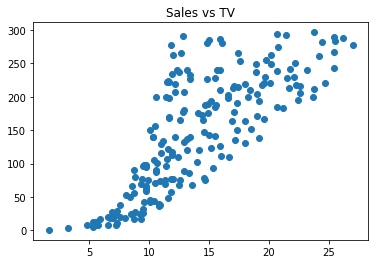

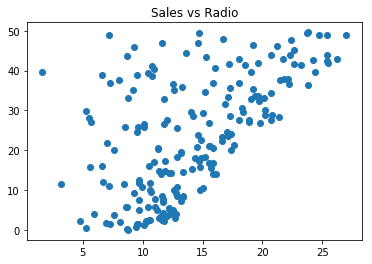

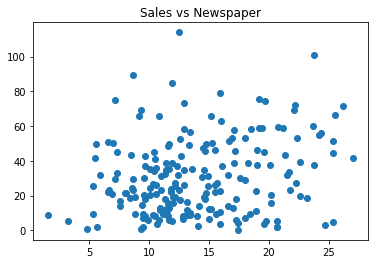

In [4]:
#check to see if features and outcome have a linear relationship
plt.scatter(data['Sales'], data['TV'])
plt.title('Sales vs TV')
plt.show()

plt.scatter(data['Sales'], data['Radio'])
plt.title('Sales vs Radio')
plt.show()

plt.scatter(data['Sales'], data['Newspaper'])
plt.title('Sales vs Newspaper')
plt.show()

It seems like both TV and Newspapaer do not have linear relationships with Sales.

In [5]:
#Sales vs TV looks a bit quadratic - try and transform
data['TV_sqrt'] = [math.sqrt(x) for x in data['TV']]

Text(0.5, 1.0, 'Sales vs sqrt(TV)')

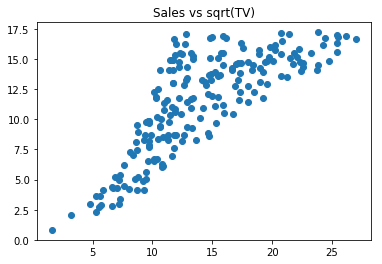

In [6]:
#replot Sales vs TV - a little better
plt.scatter(data['Sales'], data['TV_sqrt'])
plt.title('Sales vs sqrt(TV)')

In [7]:
#check to see if any variables are highly correlated - in case that is the case
#and a variable needs to be removed to improve the model
correlation_matrix = data[['TV_sqrt', 'Radio', 'Newspaper']].corr()
display(correlation_matrix)

,TV_sqrt,Radio,Newspaper
TV_sqrt,1.000,0.029,0.044
Radio,0.029,1.000,0.354
Newspaper,0.044,0.354,1.000


In [11]:
#try the model again
#instantiate and fit model
regr = linear_model.LinearRegression()
Y = data['Sales']#.values.reshape(-1, 1)
X = data[['TV_sqrt', 'Radio', 'Newspaper']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
#inspect results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [ 9.74947557e-01  1.94767873e-01 -5.25277959e-04]

Intercept: 
 -1.6092798375689767

R-squared:
0.9289549053811124


In [23]:
#recheck model assumptions based on transformation of TV to square root

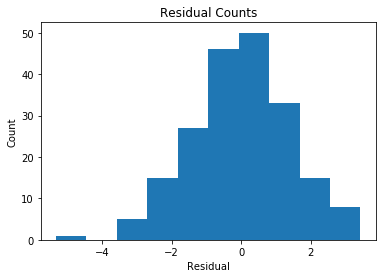

In [13]:
#extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

#calculate error (also called residual)
residual = actual - predicted

#graph
plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [25]:
#nice! residual counts much more normal!

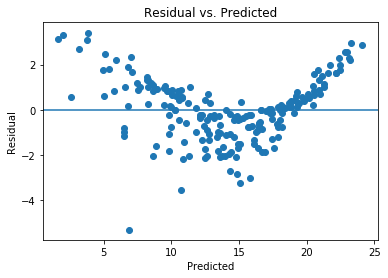

In [14]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
#still concerning - try some other transformations for Newspaper
data['Newspaper_sq'] = [(x*x*x) for x in data['Newspaper']]

In [25]:
regr = linear_model.LinearRegression()
Y_new = data['Sales']#.values.reshape(-1, 1)
X_new = data[['TV_sqrt', 'Radio', 'Newspaper_sq']]
regr.fit(X_new, Y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
#extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

#calculate error (also called residual)
residual = actual - predicted

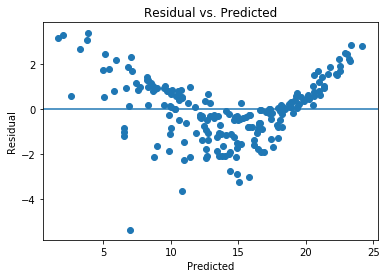

In [27]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 0)
plt.title('Residual vs. Predicted')
plt.show()

I tried a number of transformations for the variable Newspaper, but it did not improve with the model heteroscedasticity. It seems like in this case, a different model may fit this data better.